In [ ]:
import pandas as pd
result=pd.read_csv('results.csv')

# **EDA**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Set1_r")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_1975 = pd.read_csv('/content/finch_beaks_1975.csv')
df_2012 = pd.read_csv('/content/finch_beaks_2012.csv')

In [ ]:
df_1975.head()
df_1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB


In [ ]:
df_2012.head()
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
# Drop band column
df_1975.drop('band', axis=1, inplace=True)
df_2012.drop('band', axis=1, inplace=True)

In [ ]:
# Make a new column year
df_1975['year'] = '1975'
df_2012['year'] = '2012'

In [ ]:
# Rename df_1975 columns to match that of df_2012
df_1975.rename(columns={'Beak depth, mm':'bdepth', 'Beak length, mm':'blength'}, inplace=True)

In [ ]:
# Checking for any missing values
df_1975.isnull().sum()

species    0
blength    0
bdepth     0
year       0
dtype: int64

In [ ]:
# Checking for any missing values
df_2012.isnull().sum()

species    0
blength    0
bdepth     0
year       0
dtype: int64

In [ ]:
# Joining both the dataframes to get a combined new dataframe
df = pd.concat([df_1975, df_2012]).reset_index(drop=True)

In [ ]:
result=pd.read_csv('results.csv')

In [ ]:
print('\033[1m'+"Concise summary of combined dataframe"+'\033[0m \n')
result.info()

Concise summary of combined dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1302 non-null   int64  
 1   temperature    1302 non-null   float64
 2   precipitation  1302 non-null   float64
 3   date           1302 non-null   object 
 4   band           1302 non-null   int64  
 5   species        1302 non-null   object 
 6   Beak length    1302 non-null   float64
 7   Beak depth     1302 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 81.5+ KB


**There are total of 1302 rows and 8 columns in our combined dataframe. Column blength and bdepth of float type. There is no missing value in the dataframe.**

In [ ]:
print('\033[1m'+"Species column value counts"+'\033[0m', result['species'].value_counts(), sep='\n\n')

Species column value counts

species
fortis      874
scandens    428
Name: count, dtype: int64


In [ ]:
# Make new dataframes for each species
fortis = df[df['species']=='fortis'].reset_index(drop=True)
scandens = df[df['species']=='scandens'].reset_index(drop=True)

In [ ]:
print('\033[1m'+"Summary statistics for G.fortis"+'\033[0m', fortis.describe(), sep='\n\n')

Summary statistics for G.fortis

          blength      bdepth
count  437.000000  437.000000
mean    10.551945    9.014851
std      0.711748    0.777729
min      8.700000    7.200000
25%     10.000000    8.400000
50%     10.500000    9.000000
75%     11.000000    9.600000
max     12.900000   11.100000


 **The mean and median for both the columns is almost equal signifying symmetrical distribution.**

In [ ]:
print('\033[1m'+"Summary statistics for G.scandens"+'\033[0m', scandens.describe(), sep='\n\n')

Summary statistics for G.scandens

          blength      bdepth
count  214.000000  214.000000
mean    13.705561    9.094252
std      0.809788    0.637941
min     11.400000    7.700000
25%     13.100000    8.662500
50%     13.700000    9.075000
75%     14.187500    9.500000
max     15.940000   11.000000


**The species have a quite distinguised range for beak length with only a little overlapping. The curve for both species resembles a normal curve as the data is symmetrical.La especie tiene un rango tranquilo y distinguido en cuanto a la longitud del pico con solo una pequeña superposición. La curva para ambas especies se asemeja a una curva normal ya que los datos son simétricos.**

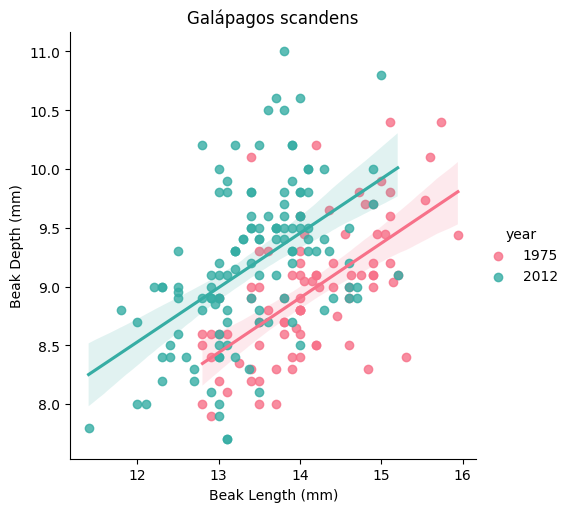

In [ ]:

unique_years = scandens['year'].unique()

# Crear un diccionario de paleta de colores asegurándote de cubrir todos los años únicos
palette = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}

# Crear el lmplot con la paleta de colores personalizada
_ = sns.lmplot(x='blength', y='bdepth', hue='year', data=scandens, palette=palette)
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')
_ = plt.title('Galápagos scandens')

# Mostrar el gráfico
plt.show()

**The plot shows that slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. El gráfico muestra que la pendiente fue la misma en 1975 y 2012, lo que sugiere que por cada milímetro ganado en longitud del pico, las aves ganaron aproximadamente medio milímetro en profundidad en ambos años.**

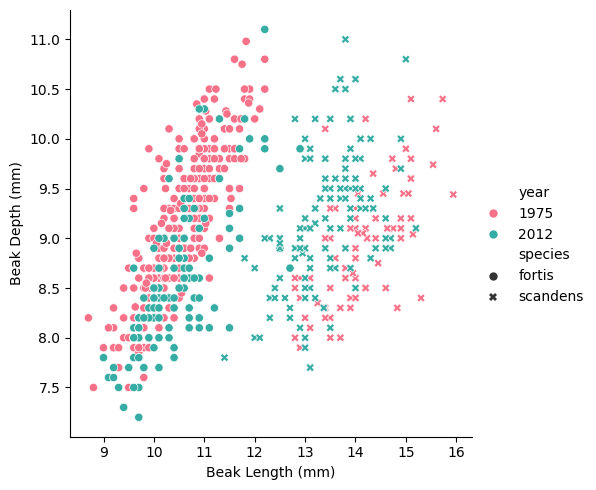

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_years = df['year'].unique()

palette = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}

_ = sns.relplot(x='blength', y='bdepth', data=df, style='species', hue='year', palette=palette)
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')

# Mostrar el gráfico
plt.show()


In [ ]:
#Del gráfico podemos ver que las especies G.fortis y G.scandens se distinguen fácilmente. Para las especies de
#G.fortis representadas por un punto (.), el tamaño del pico se hizo menos profundo (los puntos marrones están más abajo
#en la dirección y) y un poco más largo (el punto marrón está más adelante en la dirección x). El tamaño del pico de las especies
#de G.scandens representadas por (x) se ha vuelto un poco más profundo (x marrones más arriba en la dirección y) y más corto
 #(x marrones a la izquierda de las x rosadas).

From the plot we can see that species G.fortis and G.scandens are easily distinguished. For G.fortis species represented by (.) dot the beak size got less deeper (the brown dots are lower down in the y-direction) and a little longer (brown dot furthur ahead in the x-direction). The beak size of G.scandens species represented by (x) have got a little deeper (brown x's in higher up in y-direction) and shorter(brown x's to the left of pink x's).

In [ ]:
#ECDF is an estimator of the Cumulative Distribution Function. An ECDF represents the proportion or count of observations
#falling below each unique value in a dataset
#F representa la proporción o el recuento de observaciones que caen por debajo de cada valor único en un conjunto de datos.

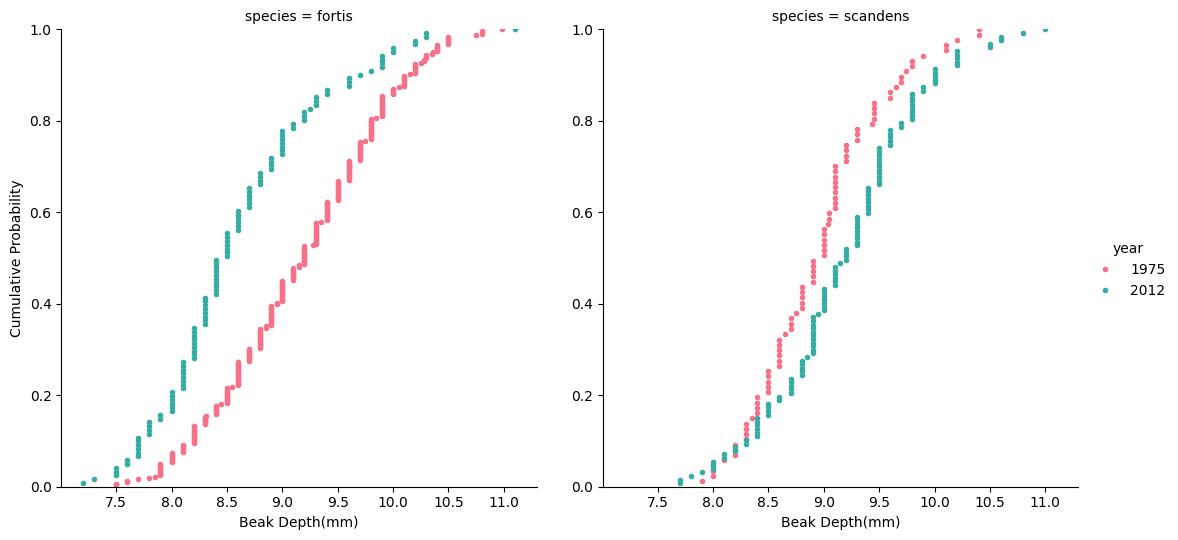

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_years = df['year'].unique()

palette = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}

# Crear el FacetGrid y mapear los gráficos ECDF
g = sns.FacetGrid(df, col="species", hue="year", height=5.5, sharey=False, palette=palette)
_ = g.map(sns.ecdfplot, 'bdepth', linestyle='none', marker='.')
_ = g.add_legend()
_ = g.set_axis_labels('Beak Depth(mm)', 'Cumulative Probability')

# Mostrar el gráfico
plt.show()


In [ ]:
#For G.fortis the mean beak depth of 2012 is considerably shorter than 1975. Whereas, for species G.scandens the mean beak
#depth has increased slightly from 1975 to 2012. The variance is slightly higher for G.scandens in 2012.
#Para G.fortis, la profundidad media del pico de 2012 es considerablemente más corta que la de 1975. Mientras que, para la especie
# G.scandens, la profundidad media del pico ha aumentado ligeramente de 1975 a 2012. La variación es ligeramente mayor para G.scandens en 2012.


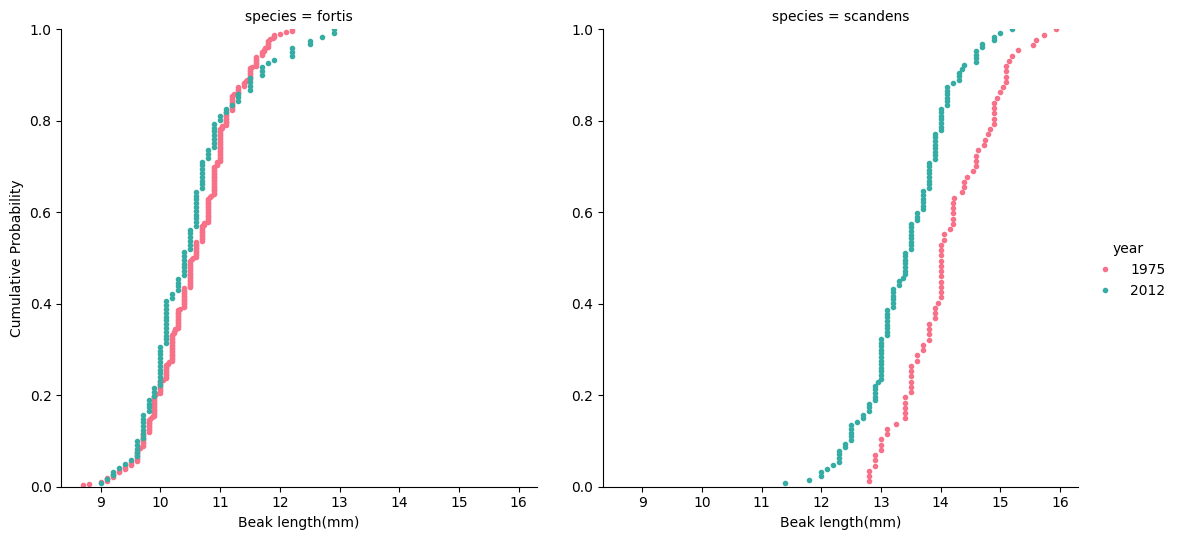

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


unique_years = df['year'].unique()

palette = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}

# Crear el FacetGrid y mapear los gráficos ECDF
g = sns.FacetGrid(df, col="species", hue="year", height=5.5, sharey=False, palette=palette)
_ = g.map(sns.ecdfplot, 'blength', linestyle='none', marker='.')
_ = g.add_legend()
_ = g.set_axis_labels('Beak length(mm)', 'Cumulative Probability')

# Mostrar el gráfico
plt.show()


In [ ]:
#Si observamos los gráficos anteriores, podemos decir que hay cambios mínimos en la longitud media del pico de G.fortis en 2012 con respecto
#a 1975, la longitud media del pico de 2012 parece ser más corta y tiene una variación mayor. Considerando que, es claramente visible que la
#longitud media del pico disminuyó en 2012 para las especies de G.scandens

In [ ]:
#La relación media entre la longitud y la profundidad del pico aumentó aproximadamente un 0,07, o un 6 %, entre 1975
#y 2012.

In [ ]:
import pandas as pd
scandens_beak_depth_2012=pd.read_csv('finch_beaks_2012.csv')
scandens_beak_depth_1975=pd.read_csv('finch_beaks_1975.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
result

,year,temperature,precipitation,date,band,species,Beak length,Beak depth,month_year
0,1975,27.483571,864.980359,1975-10,2,fortis,9.4,8.0,1975-10
1,1975,24.308678,1186.854980,1975-06,9,fortis,9.2,8.3,1975-06
2,1975,28.238443,679.713871,1975-05,12,fortis,9.5,7.5,1975-05
3,1975,32.615149,957.286154,1975-06,15,fortis,9.5,8.0,1975-06
4,1975,23.829233,1036.088690,1975-10,305,fortis,11.5,9.9,1975-10
...,...,...,...,...,...,...,...,...,...
1297,2012,29.979018,749.572864,2012-07,21295,scandens,14.2,9.3,2012-07
1298,2012,30.470151,1247.612705,2012-04,21297,scandens,13.0,9.8,2012-04
1299,2012,29.303369,897.512073,2012-06,21340,scandens,14.6,8.9,2012-06
1300,2012,25.248474,723.276452,2012-08,21342,scandens,13.1,9.8,2012-08


In [ ]:
result2=pd.read_csv('Book1.csv')
# Convertir la columna 'date' a datetime
result2['date'] = pd.to_datetime(result2['date'])

# Extraer el mes y el año
result2['month_year'] = result2['date'].dt.to_period('M')

# Si quieres reemplazar la columna existente con solo mes y año en formato string
result2['date'] = result2['date'].dt.strftime('%Y-%m')

In [ ]:
result2

,date,band,species,Beak length,Beak depth,year,month_year
0,1975-10,2,fortis,9.4,8.0,1975,1975-10
1,1975-06,9,fortis,9.2,8.3,1975,1975-06
2,1975-05,12,fortis,9.5,7.5,1975,1975-05
3,1975-06,15,fortis,9.5,8.0,1975,1975-06
4,1975-10,305,fortis,11.5,9.9,1975,1975-10
...,...,...,...,...,...,...,...
1297,2012-07,21295,scandens,14.2,9.3,2012,2012-07
1298,2012-04,21297,scandens,13.0,9.8,2012,2012-04
1299,2012-06,21340,scandens,14.6,8.9,2012,2012-06
1300,2012-08,21342,scandens,13.1,9.8,2012,2012-08


In [ ]:
result2.drop('month_year', axis=1, inplace=True)


In [ ]:
result2.drop('date', axis=1, inplace=True)


In [ ]:
result2.drop('band', axis=1, inplace=True)

In [ ]:
combined_data

,Beak length,Beak depth,year,species_fortis,species_scandens,Precipitation,Temperature_Celsius
0,9.4,8.0,1975,True,False,118.786431,28.874962
1,9.2,8.3,1975,True,False,118.786431,28.874962
2,9.5,7.5,1975,True,False,118.786431,28.874962
3,9.5,8.0,1975,True,False,118.786431,28.874962
4,11.5,9.9,1975,True,False,118.786431,28.874962
...,...,...,...,...,...,...,...
1297,14.2,9.3,2012,False,True,131.048119,10.783756
1298,13.0,9.8,2012,False,True,131.048119,10.783756
1299,14.6,8.9,2012,False,True,131.048119,10.783756
1300,13.1,9.8,2012,False,True,131.048119,10.783756


#**Predictions**

# **XGBOOST**

In [ ]:
pip install xgboost


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

data = pd.read_csv("results.csv")

# Check the data structure
print("Original data:")
print(data.head())

# Filter data for the year 2012
data_2012 = data[data['year'] == 2012]

# Check the diversity of labels before the split
print("\nSpecies distribution before split:")
print(data_2012['species'].value_counts())

# Data preprocessing
X = data_2012[['temperature', 'precipitation', 'Beak length', 'Beak depth']]  # Input features
y = data_2012['species']  # Output labels (species)

# Convert species labels into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the diversity of labels after the split
print("\nSpecies distribution in the training set:")
print(pd.Series(y_train).value_counts())
print("\nSpecies distribution in the test set:")
print(pd.Series(y_test).value_counts())

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DMatrix, the data structure of XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set the model hyperparameters
params = {
    'objective': 'multi:softprob',  # Change to 'multi:softprob' to get probabilities
    'num_class': len(label_encoder.classes_),  # Number of classes
    'eval_metric': ['mlogloss', 'merror'],  # Evaluation metrics
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum tree depth
    'verbosity': 1
}

# Train the model
num_boost_round = 100
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round, evals, early_stopping_rounds=10, evals_result=evals_result)

# Print the evaluation results
print("\nEvaluation results:")
print(evals_result)

# Make predictions
predictions_prob = model.predict(dtest)
predictions = predictions_prob.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'\nTest Accuracy: {accuracy}')

# Calculate train accuracy
train_predictions_prob = model.predict(dtrain)
train_predictions = train_predictions_prob.argmax(axis=1)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Train Accuracy: {train_accuracy}')

# Calculate the loss for train and test
train_loss = evals_result['train']['mlogloss'][-1]
test_loss = evals_result['test']['mlogloss'][-1]
print(f'\nTrain Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# To predict the species with new climatic conditions and beak dimensions
future_temperature = 25
future_precipitation = 500
future_beak_length = 10
future_beak_depth = 5

# Create the new dataset with the features
future_data = [[future_temperature, future_precipitation, future_beak_length, future_beak_depth]]

# Normalize the input data of the new climatic conditions and beak dimensions
future_data_scaled = scaler.transform(future_data)
dfuture = xgb.DMatrix(future_data_scaled)

# Predict the species with the new climatic conditions and beak dimensions
predicted_species_prob = model.predict(dfuture)
predicted_species_encoded = predicted_species_prob.argmax(axis=1)

# Convert the prediction back to the original label
predicted_species = label_encoder.inverse_transform(predicted_species_encoded)

print("\nPrediction of the species for the new climatic conditions and beak dimensions:")
print(f"Predicted species: {predicted_species[0]}")


# **Random forest**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Load the data
data = pd.read_csv("results.csv")

# Filter data for the year 2012
data_2012 = data[data['year'] == 2012]

# Data preprocessing
X = data_2012[['temperature', 'precipitation', 'Beak length', 'Beak depth']]
y = data_2012['species']

# Convert species labels into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Implement GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
train_predictions = best_model.predict(X_train_scaled)
test_predictions = best_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate log loss
train_probabilities = best_model.predict_proba(X_train_scaled)
test_probabilities = best_model.predict_proba(X_test_scaled)
train_loss = log_loss(y_train, train_probabilities)
test_loss = log_loss(y_test, test_probabilities)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# To predict the species with new climatic conditions and beak dimensions
future_temperature = 25
future_precipitation = 5
future_beak_length = 10
future_beak_depth = 5

# Create the new dataset with the features
future_data = [[future_temperature, future_precipitation, future_beak_length, future_beak_depth]]

# Normalize the input data of the new climatic conditions and beak dimensions
future_data_scaled = scaler.transform(future_data)

# Predict the species with the new climatic conditions and beak dimensions
predicted_species_encoded = best_model.predict(future_data_scaled)

# Convert the prediction back to the original label
predicted_species = label_encoder.inverse_transform(predicted_species_encoded)

print("Prediction of the species for the new climatic conditions and beak dimensions:")
print(f"Predicted species: {predicted_species[0]}")


# **Logistic Regression**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Load the data
data = pd.read_csv("results.csv")

# Filter data for the year 2012
data_2012 = data[data['year'] == 2012]

# Data preprocessing
X = data_2012[['temperature', 'precipitation', 'Beak length', 'Beak depth']]  # Input features (climatic conditions and beak dimensions)
y = data_2012['species']  # Output labels (species)

# Convert species labels into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=200)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train_scaled)
train_probabilities = model.predict_proba(X_train_scaled)

# Make predictions on the test set
test_predictions = model.predict(X_test_scaled)
test_probabilities = model.predict_proba(X_test_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Train Accuracy: {train_accuracy}')

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

# Calculate log loss on the training set
train_loss = log_loss(y_train, train_probabilities)
print(f'Train Loss: {train_loss}')

# Calculate log loss on the test set
test_loss = log_loss(y_test, test_probabilities)
print(f'Test Loss: {test_loss}')

# To predict the species with new climatic conditions and beak dimensions
future_temperature = 25
future_precipitation = 500
future_beak_length = 10
future_beak_depth = 5

# Normalize the input data of the new climatic conditions and beak dimensions
future_data = scaler.transform([[future_temperature, future_precipitation, future_beak_length, future_beak_depth]])

# Predict the species with the new climatic conditions and beak dimensions
predicted_species_encoded = model.predict(future_data)

# Convert the prediction back to the original label
predicted_species = label_encoder.inverse_transform(predicted_species_encoded)

print("\nPrediction of the species for the new climatic conditions and beak dimensions:")
print(f"Predicted species: {predicted_species[0]}")
